# Data Exploration and Visualization

In this notebook, we will explore the data and visualize it to understand the data better.

The data exploration will be focused on preparing the data for the machine learning model. I will specifically look at how the data behaves as a time series and how the data is distributed.

I will need understand whether the data is stationary or not, and if not, I will need to make it stationary.

In addition to better understanding the data, I will also like to see the long term trends in dataset related to the stocks. The following is a list of information that I will be looking at:

#### Aggregate Information (All stocks and by sector)

1. Aggregate profits and sales over time
2. Aggregate market capitalization over time
3. Aggregate P/E ratio over time

#### Individual Stock Information

1. Profits, Sales, Market Cap over Time
2. P/E ratio over time
3. Accounting Ratios over time

#### Individual Stock Information (exploring signals)

1. Changes in stock price over time
2. Changes in Financials KPI over time

In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the data

filepath_finance_data = '../Data/Datasets/updated_finance_data.csv'
finance_data = pd.read_csv(filepath_finance_data)


In [3]:
# Checking the data
# ordering all columns in alphabetical order

finance_data = finance_data.reindex(sorted(finance_data.columns), axis=1)

# for easier viewing, I will make sure all float values are rounded to 2 decimal places and have commas

pd.options.display.float_format = '{:,.2f}'.format

# sorting the finance data by symbol (ascending) and date_x (ascending)

finance_data = finance_data.sort_values(by=['symbol', 'date_x'], ascending=[True, True])

# removing countries that create noise in the data

country2remove = ['IN', 'JP', 'CN', 'BR', 'TW', 'DK'] # removed as it looks like some of the data was not accurate for these countries

finance_data = finance_data[~finance_data['country'].isin(country2remove)]

# viewing the first 10 rows of the data

finance_data.head(10)


,addTotalDebt,assetGrowth,assetTurnover,averageInventory,averagePayables,averageReceivables,beta,bookValuePerShare,bookValueperShareGrowth,calendarYear,...,threeYNetIncomeGrowthPerShare,threeYOperatingCFGrowthPerShare,threeYRevenueGrowthPerShare,threeYShareholdersEquityGrowthPerShare,totalDebtToCapitalization,updatedFromDate,weightedAverageSharesDilutedGrowth,weightedAverageSharesGrowth,workingCapital,zip
39,36403000000,0.13,0.28,"2,197,000,000.00","34,098,500,000.00","17,084,500,000.00",1.24,5.28,0.12,2015,...,0.54,1.14,0.80,0.53,0.23,2024-11-25,-0.02,-0.02,"9,792,000,000.00",95014
38,43871000000,-0.00,0.22,"2,339,500,000.00","30,580,000,000.00","13,807,000,000.00",1.24,5.57,0.05,2015,...,0.32,0.54,0.67,0.42,0.25,2024-11-25,-0.01,-0.01,"9,162,000,000.00",95014
37,54418000000,0.05,0.18,"2,219,000,000.00","24,816,500,000.00","10,637,500,000.00",1.24,5.48,-0.01,2015,...,0.38,0.68,0.62,0.29,0.30,2024-11-25,-0.01,-0.01,"5,668,000,000.00",95014
36,64328000000,0.06,0.18,"2,195,500,000.00","30,982,000,000.00","13,609,500,000.00",1.24,5.28,-0.04,2015,...,0.57,0.72,0.67,0.17,0.35,2024-11-25,-0.02,-0.01,"8,768,000,000.00",95014
35,62963000000,0.01,0.26,"2,400,000,000.00","34,401,000,000.00","14,901,000,000.00",1.24,5.77,0.09,2016,...,0.66,0.39,0.65,0.19,0.33,2024-11-25,-0.02,-0.02,"127,000,000.00",95014
34,79872000000,0.04,0.17,"2,366,000,000.00","29,205,000,000.00","12,591,000,000.00",1.24,5.91,0.03,2016,...,0.31,0.11,0.38,0.15,0.38,2024-11-25,-0.01,-0.01,"19,327,000,000.00",95014
33,84935000000,0.00,0.14,"2,056,000,000.00","25,708,000,000.00","11,971,500,000.00",1.24,5.81,-0.02,2016,...,0.33,0.60,0.42,0.21,0.40,2024-11-25,-0.01,-0.01,"22,275,000,000.00",95014
32,87032000000,0.05,0.15,"1,981,500,000.00","31,806,000,000.00","20,506,500,000.00",1.24,5.97,0.03,2016,...,0.42,0.92,0.47,0.22,0.40,2024-11-25,-0.01,-0.01,"27,863,000,000.00",95014
31,87549000000,0.03,0.24,"2,422,000,000.00","37,902,000,000.00","28,638,000,000.00",1.24,6.25,0.05,2017,...,0.62,0.42,0.61,0.21,0.40,2024-11-25,-0.01,-0.01,"19,202,000,000.00",95014
30,98522000000,0.01,0.16,"2,811,000,000.00","33,541,500,000.00","24,294,500,000.00",1.24,6.41,0.03,2017,...,0.26,0.09,0.36,0.31,0.42,2024-11-25,-0.01,-0.01,"28,648,000,000.00",95014


In [4]:
# checking if any rows are duplicated

duplicate_rows = finance_data.duplicated()

# checking if any rows are duplicated

duplicate_rows.sum()

0

In [5]:
# Getting the summary statistics of the data

finance_data.describe()

,addTotalDebt,assetGrowth,assetTurnover,averageInventory,averagePayables,averageReceivables,beta,bookValuePerShare,bookValueperShareGrowth,calendarYear,...,tenYShareholdersEquityGrowthPerShare,threeYDividendperShareGrowthPerShare,threeYNetIncomeGrowthPerShare,threeYOperatingCFGrowthPerShare,threeYRevenueGrowthPerShare,threeYShareholdersEquityGrowthPerShare,totalDebtToCapitalization,weightedAverageSharesDilutedGrowth,weightedAverageSharesGrowth,workingCapital
count,"10,387.00","10,387.00","10,374.00","10,156.00","10,156.00","10,156.00","10,387.00","10,349.00","10,387.00","10,387.00",...,"10,387.00","10,387.00","10,387.00","10,387.00","10,387.00","10,387.00","10,387.00","10,387.00","10,387.00","10,333.00"
mean,"37,697,096,037.52",0.03,0.15,"-6,590,429,988.47","8,561,926,143.84","7,261,348,543.36",1.01,31.74,294.25,"2,019.35",...,115.68,66.55,160.52,69.28,244.55,192.49,0.49,196.27,193.99,"11,710,203,450.53"
std,"68,820,737,916.18",0.40,0.14,"90,192,679,551.62","25,875,656,737.60","14,269,148,225.66",0.52,49.33,"17,316.93",2.96,...,"11,422.13","5,097.04","11,426.21","6,950.83","14,652.78","13,816.22",0.34,"14,146.03","13,986.02","90,654,145,522.09"
min,0.00,-1.00,-0.87,"-1,507,877,000,000.00","-39,016,000,000.00",0.00,0.00,-745.02,-22.39,"2,000.00",...,-178.08,-1.00,-739.23,"-1,190.91",-2.88,-236.80,-6.42,-1.00,-1.00,"-1,026,762,000,000.00"
25%,"5,384,237,500.00",-0.01,0.06,0.50,"384,508,875.00","931,487,875.00",0.65,8.10,-0.01,"2,017.00",...,0.00,0.00,-0.08,-0.09,0.05,-0.02,0.31,-0.01,-0.01,"-656,000,000.00"
50%,"14,257,000,000.00",0.01,0.12,"1,023,467,000.00","1,523,950,000.00","2,703,700,000.00",1.01,20.84,0.01,"2,019.00",...,0.62,0.18,0.30,0.25,0.22,0.17,0.47,-0.00,-0.00,"1,736,831,000.00"
75%,"37,908,450,000.00",0.03,0.18,"3,441,250,000.00","5,660,750,000.00","7,268,750,000.00",1.29,40.66,0.04,"2,022.00",...,1.53,0.40,0.94,0.86,0.45,0.42,0.63,0.00,0.00,"7,125,000,000.00"
max,"878,011,000,000.00",20.96,1.29,"172,220,000,000.00","286,482,500,000.00","252,555,500,000.00",3.92,"1,249.26","1,064,756.25","2,025.00",...,"1,164,081.57","510,857.60","882,351.94","708,399.84","1,035,709.36","1,009,784.64",8.45,"1,038,577.42","1,038,577.42","1,827,149,000,000.00"


In [6]:
# converting all the date columns to datetime in the finance dataset

date_columns = ['date_x', 'date', 'date_1', 'date_7', 'date_28', 'date_91', 'fiscalDateEnding']

for column in date_columns:
    finance_data[column] = pd.to_datetime(finance_data[column])

finance_data.dtypes

addTotalDebt                            int64
assetGrowth                           float64
assetTurnover                         float64
averageInventory                      float64
averagePayables                       float64
                                       ...   
updatedFromDate                        object
weightedAverageSharesDilutedGrowth    float64
weightedAverageSharesGrowth           float64
workingCapital                        float64
zip                                    object
Length: 169, dtype: object

In [7]:
# viewing head of data again for reference

finance_data.head(10)


,addTotalDebt,assetGrowth,assetTurnover,averageInventory,averagePayables,averageReceivables,beta,bookValuePerShare,bookValueperShareGrowth,calendarYear,...,threeYNetIncomeGrowthPerShare,threeYOperatingCFGrowthPerShare,threeYRevenueGrowthPerShare,threeYShareholdersEquityGrowthPerShare,totalDebtToCapitalization,updatedFromDate,weightedAverageSharesDilutedGrowth,weightedAverageSharesGrowth,workingCapital,zip
39,36403000000,0.13,0.28,"2,197,000,000.00","34,098,500,000.00","17,084,500,000.00",1.24,5.28,0.12,2015,...,0.54,1.14,0.80,0.53,0.23,2024-11-25,-0.02,-0.02,"9,792,000,000.00",95014
38,43871000000,-0.00,0.22,"2,339,500,000.00","30,580,000,000.00","13,807,000,000.00",1.24,5.57,0.05,2015,...,0.32,0.54,0.67,0.42,0.25,2024-11-25,-0.01,-0.01,"9,162,000,000.00",95014
37,54418000000,0.05,0.18,"2,219,000,000.00","24,816,500,000.00","10,637,500,000.00",1.24,5.48,-0.01,2015,...,0.38,0.68,0.62,0.29,0.30,2024-11-25,-0.01,-0.01,"5,668,000,000.00",95014
36,64328000000,0.06,0.18,"2,195,500,000.00","30,982,000,000.00","13,609,500,000.00",1.24,5.28,-0.04,2015,...,0.57,0.72,0.67,0.17,0.35,2024-11-25,-0.02,-0.01,"8,768,000,000.00",95014
35,62963000000,0.01,0.26,"2,400,000,000.00","34,401,000,000.00","14,901,000,000.00",1.24,5.77,0.09,2016,...,0.66,0.39,0.65,0.19,0.33,2024-11-25,-0.02,-0.02,"127,000,000.00",95014
34,79872000000,0.04,0.17,"2,366,000,000.00","29,205,000,000.00","12,591,000,000.00",1.24,5.91,0.03,2016,...,0.31,0.11,0.38,0.15,0.38,2024-11-25,-0.01,-0.01,"19,327,000,000.00",95014
33,84935000000,0.00,0.14,"2,056,000,000.00","25,708,000,000.00","11,971,500,000.00",1.24,5.81,-0.02,2016,...,0.33,0.60,0.42,0.21,0.40,2024-11-25,-0.01,-0.01,"22,275,000,000.00",95014
32,87032000000,0.05,0.15,"1,981,500,000.00","31,806,000,000.00","20,506,500,000.00",1.24,5.97,0.03,2016,...,0.42,0.92,0.47,0.22,0.40,2024-11-25,-0.01,-0.01,"27,863,000,000.00",95014
31,87549000000,0.03,0.24,"2,422,000,000.00","37,902,000,000.00","28,638,000,000.00",1.24,6.25,0.05,2017,...,0.62,0.42,0.61,0.21,0.40,2024-11-25,-0.01,-0.01,"19,202,000,000.00",95014
30,98522000000,0.01,0.16,"2,811,000,000.00","33,541,500,000.00","24,294,500,000.00",1.24,6.41,0.03,2017,...,0.26,0.09,0.36,0.31,0.42,2024-11-25,-0.01,-0.01,"28,648,000,000.00",95014


In [8]:
# checking specific company data ,by filtering the data for a specific symbol and columnn and date range

symbol = 'TSM'
column = 'marketCap'
start_date = '2014-01-01'

# filtering the data for the specific symbol and column

symbol_data = finance_data[(finance_data['symbol'] == symbol) & (finance_data['date_x'] >= start_date)][['date_x', 'country',
                                                                                                         'stockPrice','currency', column]]

# sort the data by date (descending)

symbol_data = symbol_data.sort_values(by='date_x', ascending=False)

# viewing the data

symbol_data

,date_x,country,stockPrice,currency,marketCap


In [9]:
# creating a new column to capture the year of the data based on the date_x column.

finance_data['analysis_year'] = finance_data['date_x'].dt.year

# creating a new column where quarter of the year is captured based on the date_x column

finance_data['analysis_quarter'] = finance_data['date_x'].dt.quarter


In [10]:
# to better understand the data, creating a pivot table where sector is the row and columns are the analysis year. The values is the count of symbols in the industry. Only years 2014 to 2024 are to be shown.'

industry_pivot = finance_data[finance_data['analysis_year'].between(2015, 2024)].pivot_table(index='sector', columns='analysis_year', values='symbol', aggfunc='count')

# viewing the pivot table

industry_pivot

analysis_year,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
sector,,,,,,,,,,
Basic Materials,34,34,33,34,34,34,34,34,35,25
Communication Services,52,55,55,55,56,57,58,59,58,43
Consumer Cyclical,81,87,89,88,90,92,91,92,93,73
Consumer Defensive,56,56,55,56,56,56,56,57,58,42
Energy,84,84,84,84,84,84,84,85,85,63
Financial Services,200,200,199,200,200,200,200,200,199,150
Healthcare,119,120,121,120,120,119,120,120,121,91
Industrials,135,137,136,136,140,139,140,141,140,105
Real Estate,28,28,28,28,28,28,28,28,28,21


In [11]:
# function to see the distribution of the KPIs at a high level by sector

def create_facet_plot(data, sectors, column, start_date=None, end_date=None, **kwargs):
    """
    Creates a 3 by 3 facet plot with scatter plots based on sectors and a specified date range.

    Parameters:
    data (pd.DataFrame): DataFrame containing the data.
    sectors (list): List of sectors to be plotted.
    column (str): Column to be plotted.
    start_date (str): Start date for filtering the data (inclusive).
    end_date (str): End date for filtering the data (inclusive).
    **kwargs: Additional keyword arguments for customizing the plot.

    Returns:
    None
    """
    # Filter the data for the specified sectors
    filtered_data = data[data['sector'].isin(sectors)]

    # Filter the data for the specified date range
    if start_date:
        filtered_data = filtered_data[filtered_data['date_x'] >= start_date]
    if end_date:
        filtered_data = filtered_data[filtered_data['date_x'] <= end_date]

    # Create the facet grid
    g = sns.FacetGrid(filtered_data, col="sector", col_wrap=3, height=4, **kwargs)

    # Map the scatterplot to the facet grid
    g.map(sns.scatterplot, "date_x", column)

    # Customize the appearance of the plot
    g.set_titles("{col_name}")
    g.set_axis_labels("Date", column)
    g.add_legend()

    # Show the plot
    plt.show()


In [12]:
# function to see the distribution of the KPIs at a high level by sector (line plot)

def create_facet_line_plot(data, sectors, column, start_date=None, end_date=None, **kwargs):
    """
    Creates a 3 by 3 facet plot with line graphs of the mean KPI based on sectors and a specified date range.

    Parameters:
    data (pd.DataFrame): DataFrame containing the data.
    sectors (list): List of sectors to be plotted.
    column (str): Column to be plotted.
    start_date (str): Start date for filtering the data (inclusive).
    end_date (str): End date for filtering the data (inclusive).
    **kwargs: Additional keyword arguments for customizing the plot.

    Returns:
    None
    """
    # Filter the data for the specified sectors
    filtered_data = data[data['sector'].isin(sectors)]

    # Filter the data for the specified date range
    if start_date:
        filtered_data = filtered_data[filtered_data['date_x'] >= start_date]
    if end_date:
        filtered_data = filtered_data[filtered_data['date_x'] <= end_date]

    # Group by sector and date_x, then calculate the mean of the specified column
    mean_data = filtered_data.groupby(['sector', 'date_x'])[column].mean().reset_index()

    # Create the facet grid
    g = sns.FacetGrid(mean_data, col="sector", col_wrap=3, height=4, **kwargs)

    # Map the lineplot to the facet grid
    g.map(sns.lineplot, "date_x", column)

    # Customize the appearance of the plot
    g.set_titles("{col_name}")
    g.set_axis_labels("Date", column)
    g.add_legend()

    # Show the plot
    plt.show()


In [13]:
# Sectors with the most symbols that will be the focus for visual inspection
sectors = ['Financial Services', 'Technology', 'Industrials',
           'Healthcare', 'Consumer Cyclical', 'Energy',
           'Consumer Defensive', 'Utilities', 'Communication Services']


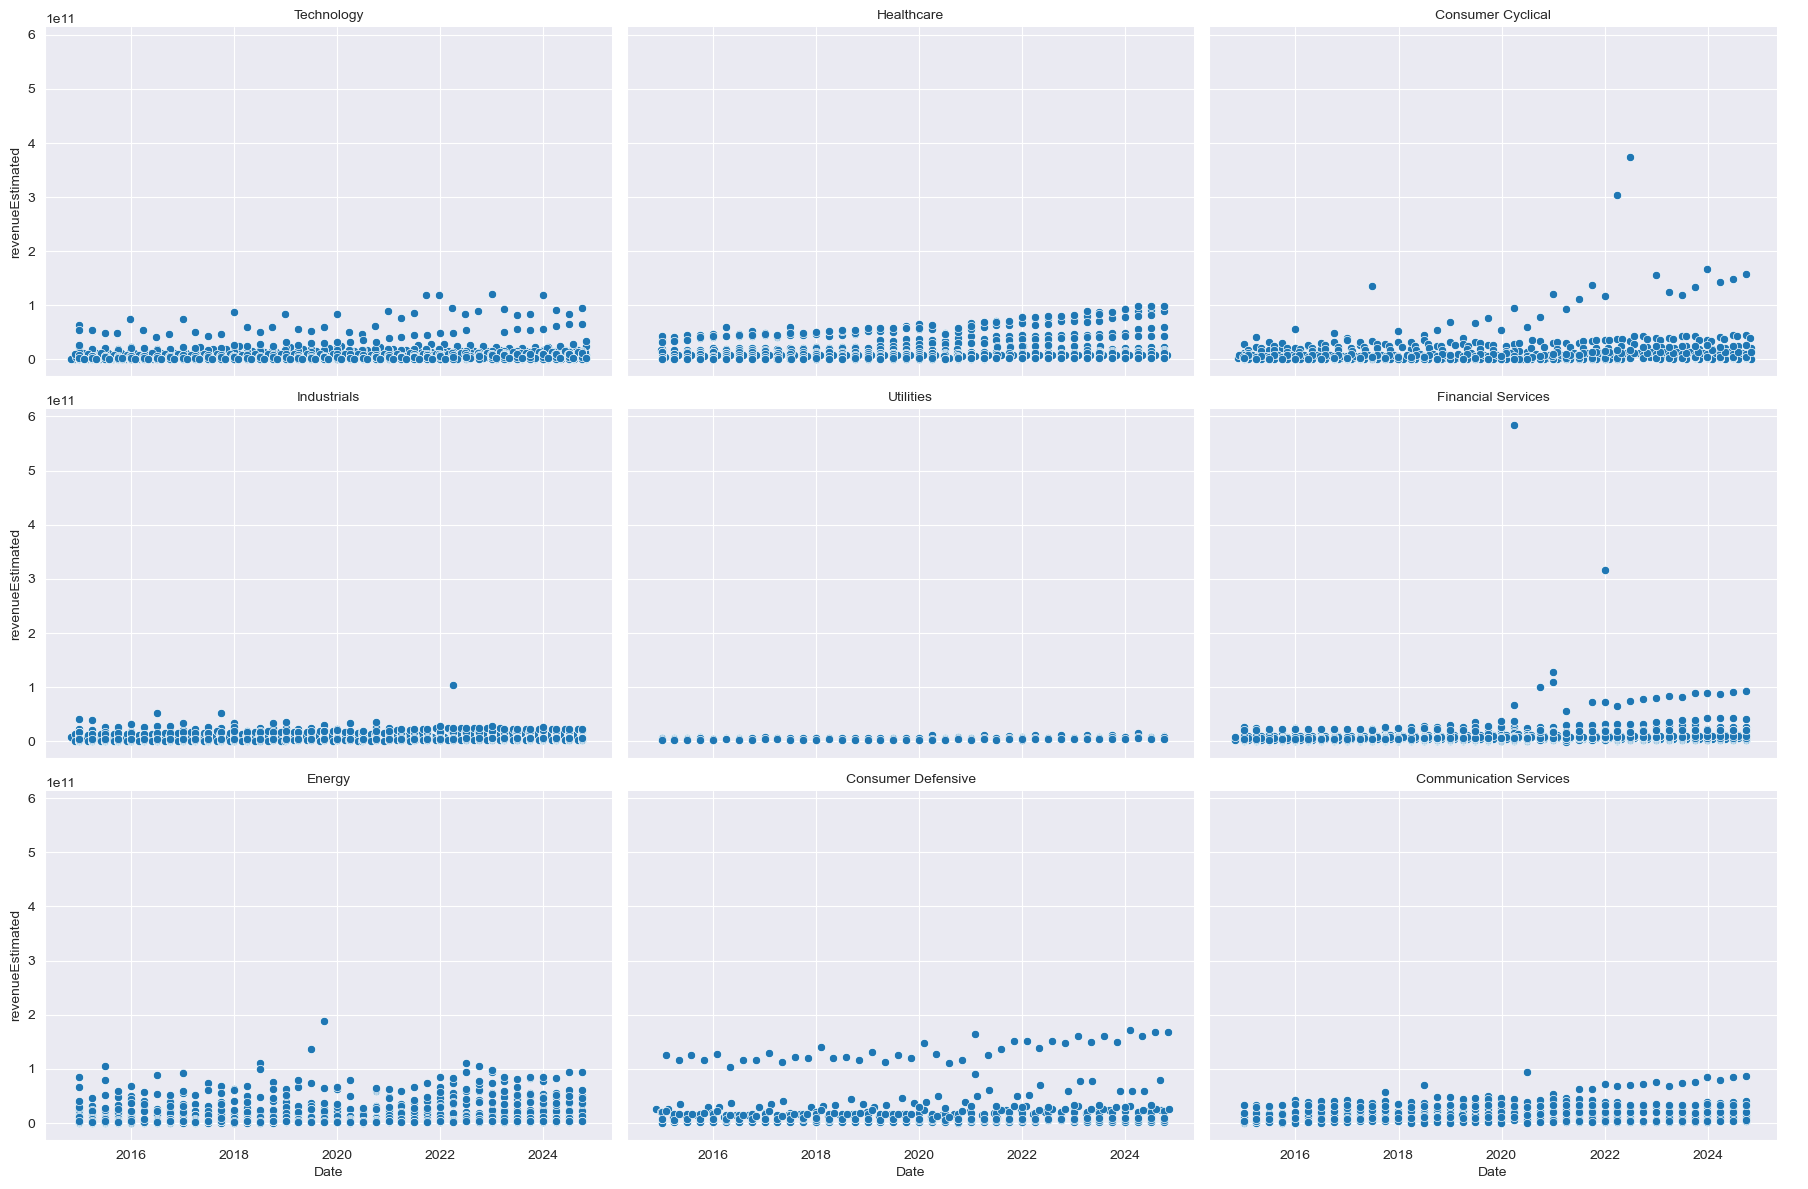

In [14]:
# Plotting the market capitalization by sector since 2014
create_facet_plot(finance_data, sectors, 'revenueEstimated', start_date='2014-01-01', aspect=1.5)


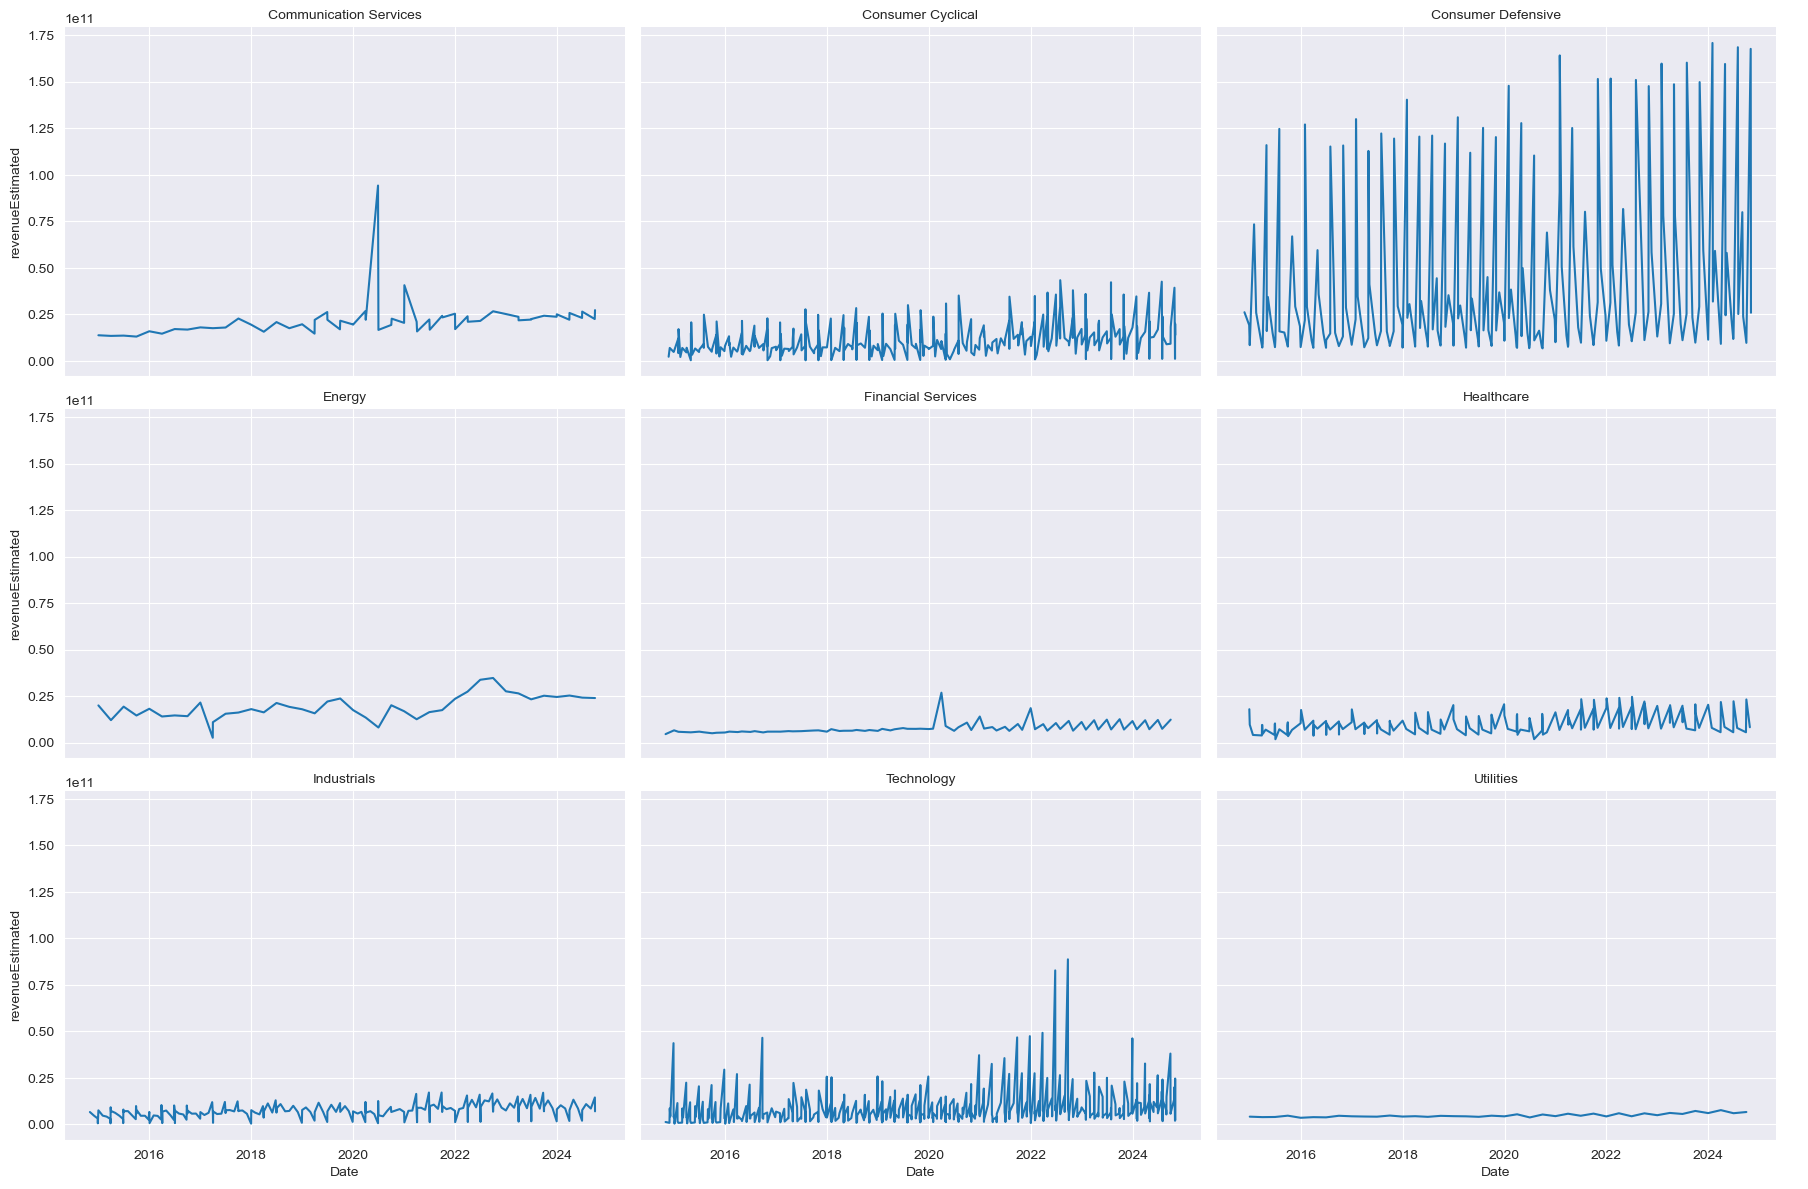

In [15]:
# Plotting the Revenue per share by sector since 2014 (line plot)

create_facet_line_plot(finance_data, sectors, 'revenueEstimated', start_date='2014-01-01', aspect=1.5)


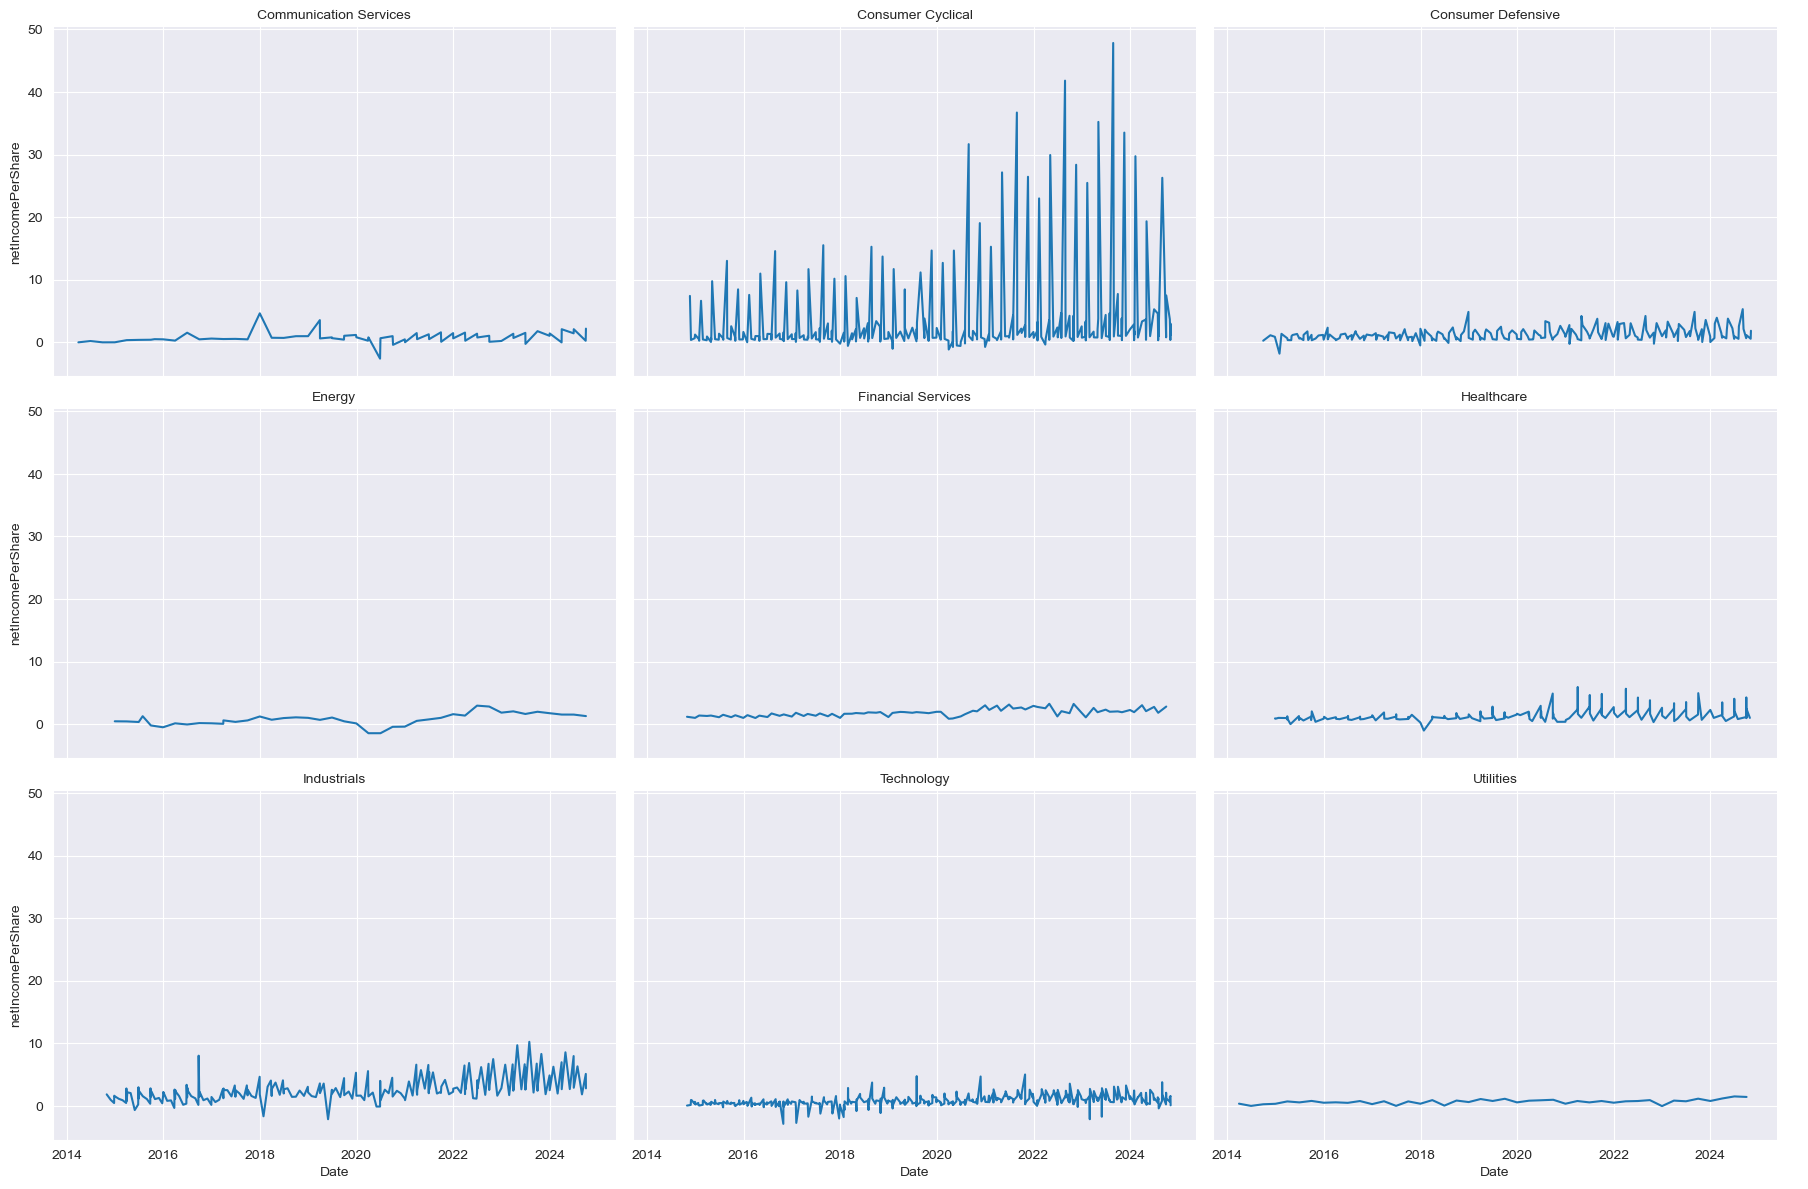

In [16]:
# Plotting the netIncomePerShare by sector since 2014 (line plot)

create_facet_line_plot(finance_data, sectors, 'netIncomePerShare', start_date='2014-01-01', aspect=1.5)

In [17]:


def create_rel_plot(data, sector, column, start_date=None, end_date=None, palette='viridis', scale=1, **kwargs):
    """
    Creates a relplot with 'date_x' on the x-axis and the specified column on the y-axis.
    Only graphs the 15 largest symbols by market cap as of the max 'date_x' for each symbol within the specified sector.

    Parameters:
    data (pd.DataFrame): DataFrame containing the data.
    sector (str): Sector to be plotted.
    column (str): Column to be plotted.
    start_date (str): Start date for filtering the data (inclusive).
    end_date (str): End date for filtering the data (inclusive).
    palette (str): Color palette to use for the plot.
    scale (float): Scale to apply to the y-axis values (e.g., 1e9 for billions).
    **kwargs: Additional keyword arguments for customizing the plot.

    Returns:
    None
    """
    # Filter the data for the specified sector
    sector_data = data[data['sector'] == sector]

    # Filter the data for the specified date range
    if start_date:
        sector_data = sector_data[sector_data['date_x'] >= start_date]
    if end_date:
        sector_data = sector_data[sector_data['date_x'] <= end_date]

    # Find the 15 largest symbols by market cap as of the max 'date_x' for each symbol
    latest_data = sector_data.loc[sector_data.groupby('symbol')['date_x'].idxmax()]
    top_symbols = latest_data.nlargest(15, 'marketCap')['symbol']

    # Filter the data to include only the top 15 symbols
    filtered_data = sector_data[sector_data['symbol'].isin(top_symbols)]

    # Apply the scale to the specified column using .loc
    filtered_data.loc[:, column] = filtered_data[column] / scale

    # Create the relplot
    sns.relplot(data=filtered_data, x='date_x', y=column, hue='symbol', kind='line', palette=palette, **kwargs)

    # Customize the appearance of the plot
    plt.title(f'{column} over Time for Top 15 Symbols in {sector}')
    plt.xlabel('Date')
    plt.ylabel(f'{column} (scaled by {scale})')
    #plt.legend(title='Symbol')
    plt.show()


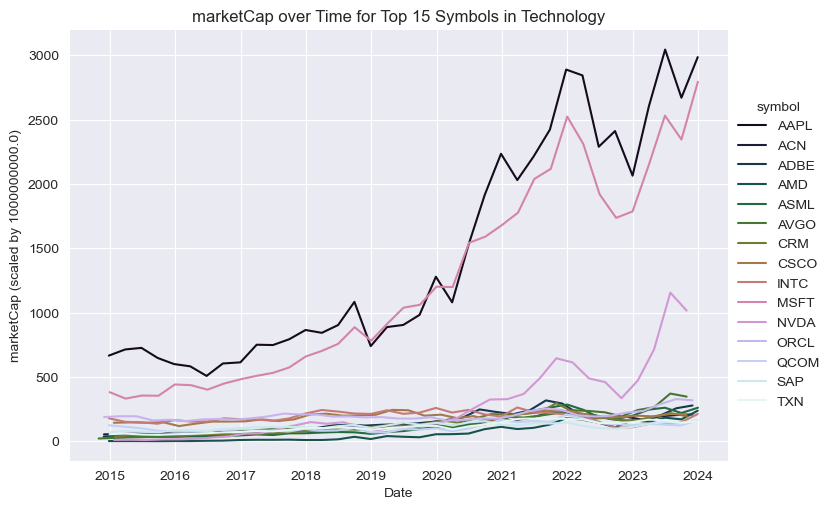

In [18]:
# Example usage
create_rel_plot(finance_data, 'Technology', 'marketCap', start_date='2014-01-01', end_date='2023-12-31', palette='cubehelix', scale=1e9, aspect=1.5)


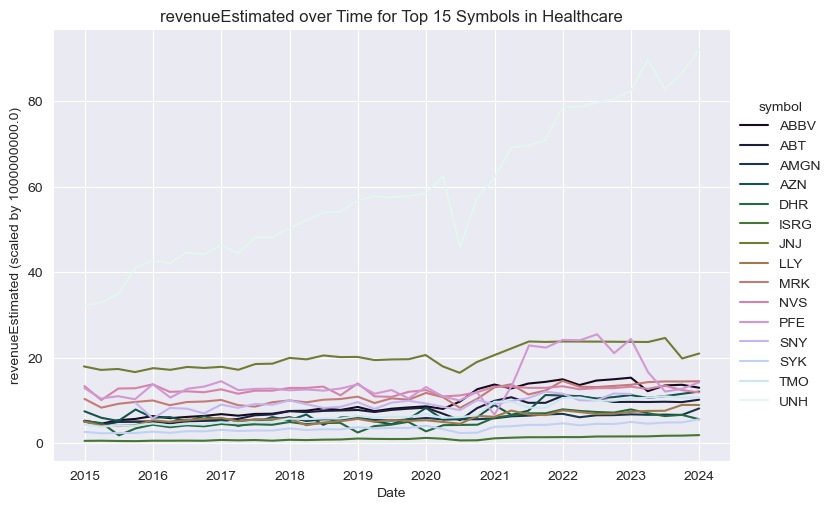

In [19]:
# Example usage
create_rel_plot(finance_data, 'Healthcare', 'revenueEstimated', start_date='2014-01-01', end_date='2023-12-31', palette='cubehelix', scale=1e9, aspect=1.5)


In [20]:
# creating a dataframe with the max date for each symbol and the market cap of the symbol

symbol_market_cap = finance_data.loc[finance_data.groupby('symbol')['date_x'].idxmax()][['symbol', 'marketCap', 'date_x', 'companyName', 'country', 'exchange']]

#ranking the symbols by market cap

symbol_market_cap = symbol_market_cap.sort_values(by='marketCap', ascending=False)

symbol_market_cap

,symbol,marketCap,date_x,companyName,country,exchange
0,AAPL,"3,456,027,602,100.00",2024-09-28,Apple Inc.,US,NASDAQ Global Select
7000,NVDA,"3,447,377,160,000.00",2024-10-27,NVIDIA Corporation,US,NASDAQ Global Select
6476,MSFT,"3,198,419,900,000.00",2024-09-30,Microsoft Corporation,US,NASDAQ Global Select
4398,GOOGL,"2,038,296,500,000.00",2024-09-30,Alphabet Inc.,US,NASDAQ Global Select
702,AMZN,"1,956,651,330,000.00",2024-09-30,"Amazon.com, Inc.",US,NASDAQ Global Select
...,...,...,...,...,...,...
6795,NGG,"36,973,647,496.55",2024-03-31,National Grid plc,GB,New York Stock Exchange
3991,FANG,"35,295,452,000.00",2024-09-30,"Diamondback Energy, Inc.",US,NASDAQ Global Select
6556,MSTR,"33,260,227,800.00",2024-09-30,MicroStrategy Incorporated,US,NASDAQ Global Select
3102,CVNA,"21,569,269,130.00",2024-09-30,Carvana Co.,US,New York Stock Exchange


In [21]:
# creating a dataframe with the max date for each symbol and the market cap of the symbol

symbol_market_cap = finance_data.loc[finance_data.groupby('symbol')['date_x'].idxmax()][['symbol', 'revenueEstimated', 'date_x', 'companyName', 'country', 'exchange']]

#ranking the symbols by market cap

symbol_market_cap = symbol_market_cap.sort_values(by='revenueEstimated', ascending=False)

symbol_market_cap

,symbol,revenueEstimated,date_x,companyName,country,exchange
10836,WMT,"167,688,841,190.00",2024-10-31,Walmart Inc.,US,New York Stock Exchange
702,AMZN,"157,275,157,418.00",2024-09-30,"Amazon.com, Inc.",US,NASDAQ Global Select
10236,UNH,"99,139,359,536.00",2024-09-30,UnitedHealth Group Incorporated,US,New York Stock Exchange
0,AAPL,"94,511,953,345.00",2024-09-28,Apple Inc.,US,NASDAQ Global Select
10876,XOM,"93,981,923,466.00",2024-09-30,Exxon Mobil Corporation,US,New York Stock Exchange
...,...,...,...,...,...,...
9350,TBB,NaN,2024-09-30,AT&T Inc. 5.35% GLB NTS 66,US,New York Stock Exchange
9390,TBC,NaN,2024-09-30,AT&T Inc. 5.625% Global Notes d,US,New York Stock Exchange
10396,USB-PA,NaN,2024-09-30,U.S. Bancorp PERP PFD SER A,US,New York Stock Exchange
10436,USB-PP,NaN,2024-09-30,U.S. Bancorp,US,New York Stock Exchange


In [22]:
# I would like to check data only for specific symbols, the colums to include would be date_x, symbol, marketCap, revenueEstimated, netIncomePerShare, operatingCashFlowPerShare, freeCashFlowPerShare, capexPerShare

symbols = ['HDB']

symbol_data = finance_data[finance_data['symbol'].isin(symbols)][['date_x', 'companyName','symbol', 'marketCap', 'revenueEstimated', 'eps', 'country']]

# sorting by descending date

symbol_data = symbol_data.sort_values(by='date_x', ascending=False)

symbol_data

,date_x,companyName,symbol,marketCap,revenueEstimated,eps,country


In [23]:


def create_facet_grid(data, symbol, start_date, palette='viridis'):
    """
    Creates a 3 by 3 facet grid with line graphs for specified KPIs.

    Parameters:
    data (pd.DataFrame): DataFrame containing the data.
    symbol (str): Stock symbol to be plotted.
    start_date (str): Start date for filtering the data (inclusive).
    palette (str): Color palette to use for the plot.

    Returns:
    None
    """
    # Filter the data for the specified symbol and date range
    filtered_data = data[(data['symbol'] == symbol) & (data['date_x'] >= start_date)]

    # KPIs to be plotted
    kpis = ['revenuePerShare', 'capexPerShare', 'operatingCashFlowPerShare_x', 'epsEstimated',
            'grossProfitMargin', 'returnOnEquity', 'freeCashFlowPerShare_x', 'stockPrice', 'peRatio']

    # Get company name and sector for the main title
    company_name = filtered_data['companyName'].iloc[0]
    sector = filtered_data['sector'].iloc[0]
    main_title = f'{company_name} - {sector}'

    # Create the facet grid
    g = sns.FacetGrid(filtered_data.melt(id_vars=['date_x'], value_vars=kpis), col='variable', col_wrap=3, height=4, sharey=False, palette=palette)

    # Map the lineplot to the facet grid
    g.map(sns.lineplot, 'date_x', 'value')

    # Customize the appearance of the plot
    g.set_titles("{col_name}")
    g.set_axis_labels("Date", "")
    g.fig.suptitle(main_title, fontsize=16)
    g.fig.subplots_adjust(top=0.9)  # Adjust the top to make room for the main title

    # Show the plot
    plt.show()


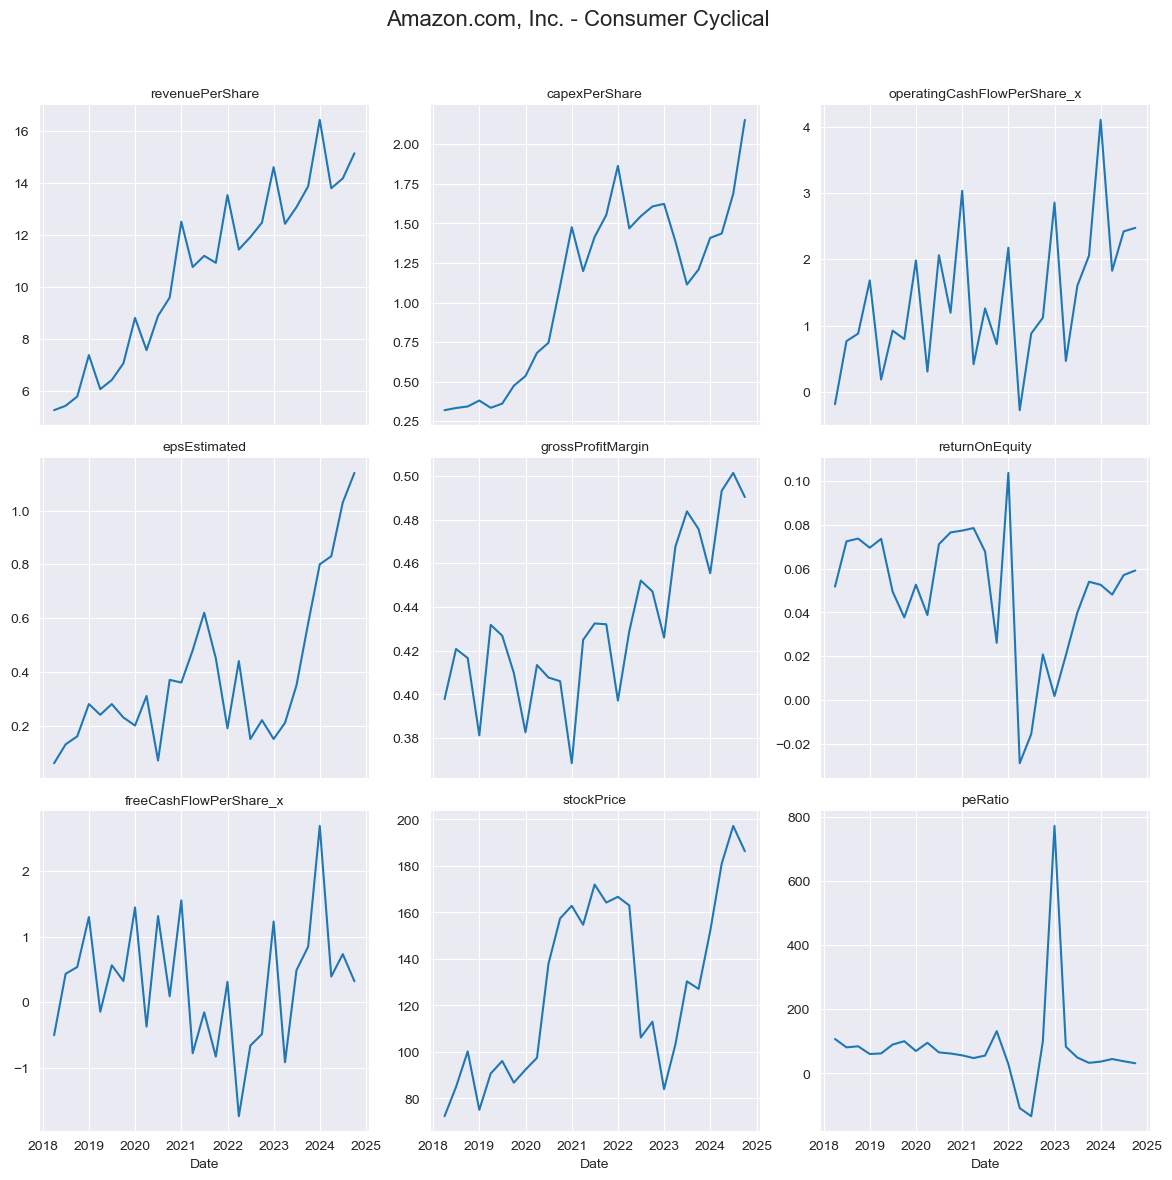

In [24]:

# Example usage
create_facet_grid(finance_data, 'AMZN', '2018-01-01', palette='cubehelix')


In [25]:
# Creating a smaller dataset that I use in model development. First creating a list of columns to be used in the smaller dataset

kpi2keep = ['revenuePerShare', 'capexPerShare', 'operatingCashFlowPerShare_x', 'epsEstimated',
            'grossProfitMargin', 'returnOnEquity', 'freeCashFlowPerShare_x', 'stockPrice', 'peRatio',
            'bookValuePerShare', 'cashPerShare_x',
            'companyName', 'date_x', 'fiscalDateEnding', 'sector', 'symbol']

# Making a copy of the finance data set and keeping only the above columns



